In [ ]:
!pip install vllm accelerate transformers
#accelerate is a hugging face tool use for running models without vLLM, its notstrictlyreqyiired

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.4/326.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.

In [ ]:
from vllm import LLM, SamplingParams #used to control how model generates output
import time

INFO 05-08 08:39:04 [__init__.py:239] Automatically detected platform cuda.


In [ ]:
def run_inference(model,dtype="float32",quantization=None,tensor_parallel_size=1,prompt="Tell me a joke"):

  model=LLM(model=model,dtype=dtype,quantization=quantization)

  sampling_params=SamplingParams(temperature=0.7,top_p=0.9,max_tokens=64)

  start_time=time.time()
  results=model.generate(prompt,sampling_params=sampling_params)
  end_time=time.time()

  latency=end_time-start_time
  ans=results[0].outputs[0].text.strip()
  tokens=len(ans.split())
  throughput=tokens/latency

  print("Output:", ans)
  print(f"Latency: {latency:.2f} sec | Throughput: {throughput:.2f} tokens/sec")

  return latency, throughput





Run baseline inference

Baseline inference on `distilgpt2` using vLLM (non-quantized, single prompt) achieved 0.36s latency and 140.71 tokens/sec throughput on a T4 GPU using the XFormers backend.


In [ ]:
run_inference("distilgpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

INFO 05-08 05:36:48 [config.py:717] This model supports multiple tasks: {'classify', 'reward', 'embed', 'generate', 'score'}. Defaulting to 'generate'.
WARNING 05-08 05:36:48 [arg_utils.py:1658] Compute Capability < 8.0 is not supported by the V1 Engine. Falling back to V0. 
INFO 05-08 05:36:48 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float32, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='auto', reasoning_backend=None), observability_config=ObservabilityConfig(show_hidden_metrics=False, otlp_tra

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

INFO 05-08 05:36:52 [cuda.py:240] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 05-08 05:36:52 [cuda.py:289] Using XFormers backend.
INFO 05-08 05:36:53 [parallel_state.py:1004] rank 0 in world size 1 is assigned as DP rank 0, PP rank 0, TP rank 0
INFO 05-08 05:36:53 [model_runner.py:1108] Starting to load model distilgpt2...
INFO 05-08 05:36:53 [weight_utils.py:265] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

INFO 05-08 05:36:57 [weight_utils.py:281] Time spent downloading weights for distilgpt2: 4.119778 seconds
INFO 05-08 05:36:57 [weight_utils.py:315] No model.safetensors.index.json found in remote.


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 05:36:58 [loader.py:458] Loading weights took 0.25 seconds
INFO 05-08 05:36:58 [model_runner.py:1140] Model loading took 0.3059 GiB and 4.933980 seconds
INFO 05-08 05:37:00 [worker.py:287] Memory profiling takes 1.01 seconds
INFO 05-08 05:37:00 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 05:37:00 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.03GiB; PyTorch activation peak memory takes 0.50GiB; the rest of the memory reserved for KV Cache is 12.44GiB.
INFO 05-08 05:37:00 [executor_base.py:112] # cuda blocks: 22644, # CPU blocks: 7281
INFO 05-08 05:37:00 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 353.81x
INFO 05-08 05:37:04 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 05:37:35 [model_runner.py:1592] Graph capturing finished in 31 secs, took 0.10 GiB
INFO 05-08 05:37:35 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 37.32 seconds


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Output: , but I've been wrong about it since the beginning.


I hate to tell you that my last words have been a joke. But it's about the actual fact that I've been wrong about it since the beginning.
I've been wrong about it since the beginning.
I can't help but
Latency: 0.36 sec | Throughput: 140.71 tokens/sec


(0.35533833503723145, 140.71096493082044)

## Simulate Dynamic batching in non qauntized model

In [ ]:
prompts = ["Tell me a joke.", "What is AI?", "Explain quantum computing.", "Give a fun fact.", "What is the capital of Peru?"]
for prompt in prompts:
    run_inference("distilgpt2", prompt=prompt)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

INFO 05-08 05:55:40 [config.py:717] This model supports multiple tasks: {'generate', 'embed', 'score', 'reward', 'classify'}. Defaulting to 'generate'.
WARNING 05-08 05:55:40 [arg_utils.py:1658] Compute Capability < 8.0 is not supported by the V1 Engine. Falling back to V0. 
INFO 05-08 05:55:40 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float32, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='auto', reasoning_backend=None), observability_config=ObservabilityConfig(show_hidden_metrics=False, otlp_tra

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

INFO 05-08 05:55:43 [cuda.py:240] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 05-08 05:55:43 [cuda.py:289] Using XFormers backend.
INFO 05-08 05:55:44 [parallel_state.py:1004] rank 0 in world size 1 is assigned as DP rank 0, PP rank 0, TP rank 0
INFO 05-08 05:55:44 [model_runner.py:1108] Starting to load model distilgpt2...
INFO 05-08 05:55:44 [weight_utils.py:265] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

INFO 05-08 05:55:52 [weight_utils.py:281] Time spent downloading weights for distilgpt2: 8.168744 seconds
INFO 05-08 05:55:52 [weight_utils.py:315] No model.safetensors.index.json found in remote.


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 05:55:53 [loader.py:458] Loading weights took 0.26 seconds
INFO 05-08 05:55:53 [model_runner.py:1140] Model loading took 0.3059 GiB and 8.902724 seconds
INFO 05-08 05:55:55 [worker.py:287] Memory profiling takes 1.00 seconds
INFO 05-08 05:55:55 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 05:55:55 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.03GiB; PyTorch activation peak memory takes 0.50GiB; the rest of the memory reserved for KV Cache is 12.44GiB.
INFO 05-08 05:55:55 [executor_base.py:112] # cuda blocks: 22644, # CPU blocks: 7281
INFO 05-08 05:55:55 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 353.81x
INFO 05-08 05:55:59 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 05:56:30 [model_runner.py:1592] Graph capturing finished in 32 secs, took 0.10 GiB
INFO 05-08 05:56:30 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 37.16 seconds


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Output: I don't know what to do, but I'm just trying to make the right decision. I think there are a lot of things that can go wrong.
Latency: 0.39 sec | Throughput: 69.68 tokens/sec
INFO 05-08 05:56:31 [config.py:717] This model supports multiple tasks: {'generate', 'embed', 'score', 'reward', 'classify'}. Defaulting to 'generate'.
INFO 05-08 05:56:31 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float32, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='auto', reasoning_backend=None), observability_con

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 05:56:33 [loader.py:458] Loading weights took 0.24 seconds
INFO 05-08 05:56:33 [model_runner.py:1140] Model loading took 0.3059 GiB and 0.532313 seconds
INFO 05-08 05:56:34 [worker.py:287] Memory profiling takes 0.48 seconds
INFO 05-08 05:56:34 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 05:56:34 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.49GiB; the rest of the memory reserved for KV Cache is 12.47GiB.
INFO 05-08 05:56:34 [executor_base.py:112] # cuda blocks: 22705, # CPU blocks: 7281
INFO 05-08 05:56:34 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 354.77x
INFO 05-08 05:56:35 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 05:57:07 [model_runner.py:1592] Graph capturing finished in 32 secs, took 0.05 GiB
INFO 05-08 05:57:07 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 33.71 seconds


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Output: How does AI work?




The AI is not simply an abstract abstraction. It is a process that is constantly changing. A process that is constantly changing, often in a way that is always changing.
In the end, we have to make sure that the process is continuously changing.
The goal
Latency: 0.30 sec | Throughput: 166.05 tokens/sec
INFO 05-08 05:57:08 [config.py:717] This model supports multiple tasks: {'generate', 'embed', 'score', 'reward', 'classify'}. Defaulting to 'generate'.
INFO 05-08 05:57:08 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float32, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=Fa

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 05:57:09 [loader.py:458] Loading weights took 0.24 seconds
INFO 05-08 05:57:10 [model_runner.py:1140] Model loading took 0.3059 GiB and 0.520857 seconds
INFO 05-08 05:57:10 [worker.py:287] Memory profiling takes 0.49 seconds
INFO 05-08 05:57:10 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 05:57:10 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.49GiB; the rest of the memory reserved for KV Cache is 12.47GiB.
INFO 05-08 05:57:11 [executor_base.py:112] # cuda blocks: 22705, # CPU blocks: 7281
INFO 05-08 05:57:11 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 354.77x
INFO 05-08 05:57:11 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 05:57:42 [model_runner.py:1592] Graph capturing finished in 31 secs, took 0.05 GiB
INFO 05-08 05:57:42 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 32.89 seconds


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Output: 
Latency: 0.32 sec | Throughput: 0.00 tokens/sec
INFO 05-08 05:57:43 [config.py:717] This model supports multiple tasks: {'generate', 'embed', 'score', 'reward', 'classify'}. Defaulting to 'generate'.
INFO 05-08 05:57:43 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float32, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='auto', reasoning_backend=None), observability_config=ObservabilityConfig(show_hidden_metrics=False, otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 05:57:45 [loader.py:458] Loading weights took 0.26 seconds
INFO 05-08 05:57:45 [model_runner.py:1140] Model loading took 0.3059 GiB and 0.534627 seconds
INFO 05-08 05:57:46 [worker.py:287] Memory profiling takes 0.49 seconds
INFO 05-08 05:57:46 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 05:57:46 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.49GiB; the rest of the memory reserved for KV Cache is 12.47GiB.
INFO 05-08 05:57:47 [executor_base.py:112] # cuda blocks: 22705, # CPU blocks: 7281
INFO 05-08 05:57:47 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 354.77x
INFO 05-08 05:57:47 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 05:58:18 [model_runner.py:1592] Graph capturing finished in 31 secs, took 0.05 GiB
INFO 05-08 05:58:18 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 32.51 seconds


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Output: ”
Latency: 0.07 sec | Throughput: 13.43 tokens/sec
INFO 05-08 05:58:18 [config.py:717] This model supports multiple tasks: {'generate', 'embed', 'score', 'reward', 'classify'}. Defaulting to 'generate'.
INFO 05-08 05:58:18 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float32, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='auto', reasoning_backend=None), observability_config=ObservabilityConfig(show_hidden_metrics=False, otlp_traces_endpoint=None, collect_model_forward_time=False, collect_mode

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 05:58:20 [loader.py:458] Loading weights took 0.26 seconds
INFO 05-08 05:58:20 [model_runner.py:1140] Model loading took 0.3059 GiB and 0.556125 seconds
INFO 05-08 05:58:21 [worker.py:287] Memory profiling takes 0.48 seconds
INFO 05-08 05:58:21 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 05:58:21 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.49GiB; the rest of the memory reserved for KV Cache is 12.47GiB.
INFO 05-08 05:58:22 [executor_base.py:112] # cuda blocks: 22705, # CPU blocks: 7281
INFO 05-08 05:58:22 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 354.77x
INFO 05-08 05:58:22 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 05:58:53 [model_runner.py:1592] Graph capturing finished in 31 secs, took 0.05 GiB
INFO 05-08 05:58:53 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 32.62 seconds


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Output: The question is whether Peru has its own way of making things better. It is not a natural land. But it is a significant land for the people of the country. There are no human rights groups in Peru that are more interested in the rights of indigenous people than the people of the country.
As a
Latency: 0.30 sec | Throughput: 190.38 tokens/sec


## Test with diff batch sizes

In [ ]:
import time

def run_inference_with_batch_size(model, dtype="float32", quantization=None, tensor_parallel_size=1, prompts=None, batch_size=1):
    """
    Run inference with dynamic batching, where the number of prompts processed in a single batch is specified.

    :param model: The model to be used for inference
    :param dtype: Data type for inference (e.g., 'float32', 'float16')
    :param quantization: Quantization type (e.g., 'int8', 'none')
    :param tensor_parallel_size: Size of tensor parallelism for distributed execution
    :param prompts: List of prompts to be used for inference
    :param batch_size: Number of prompts to batch together for each inference pass
    :return: Latency and throughput for the batch size
    """

    # Ensure prompts is a list
    if not isinstance(prompts, list):
        prompts = [prompts]  # Convert single prompt to a list for consistency

    # Clip the list of prompts to the batch size if needed
    prompts = prompts[:batch_size]

    model = LLM(model=model, dtype=dtype, quantization=quantization)

    sampling_params = SamplingParams(temperature=0.7, top_p=0.9, max_tokens=64)

    start_time = time.time()
    results = model.generate(prompts, sampling_params=sampling_params)
    end_time = time.time()

    latency = end_time - start_time
    total_tokens = sum([len(result.outputs[0].text.strip().split()) for result in results])
    throughput = total_tokens / latency

    # Display results for each prompt in the batch
    for idx, result in enumerate(results):
        print(f"Prompt {idx+1}: {prompts[idx]}")
        print("Output:", result.outputs[0].text.strip())

    print(f"Latency: {latency:.2f} sec | Throughput: {throughput:.2f} tokens/sec")

    return latency, throughput


# Example Usage: Testing with Different Batch Sizes
batch_sizes = [1, 2, 4, 8, 16]
prompts = [
    "Tell me a joke",
    "What is the capital of Laos?",
    "Describe the process of photosynthesis",
    "How does gravity work?",
    "What is the meaning of life?"
]

for batch_size in batch_sizes:
    print(f"\nTesting with batch size: {batch_size}")
    latency, throughput = run_inference_with_batch_size(
        model="distilgpt2",  # Model can be changed
        dtype="float32",  # You can experiment with other data types as well
        quantization=None,  # Quantization options if needed
        tensor_parallel_size=1,
        prompts=prompts,
        batch_size=batch_size
    )
    print(f"Batch size: {batch_size} - Latency: {latency:.2f}s | Throughput: {throughput:.2f} tokens/sec\n")



Testing with batch size: 1


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

INFO 05-08 06:22:21 [config.py:717] This model supports multiple tasks: {'embed', 'reward', 'score', 'generate', 'classify'}. Defaulting to 'generate'.
WARNING 05-08 06:22:21 [arg_utils.py:1658] Compute Capability < 8.0 is not supported by the V1 Engine. Falling back to V0. 
INFO 05-08 06:22:21 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float32, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='auto', reasoning_backend=None), observability_config=ObservabilityConfig(show_hidden_metrics=False, otlp_tra

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

INFO 05-08 06:22:27 [cuda.py:240] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 05-08 06:22:27 [cuda.py:289] Using XFormers backend.
INFO 05-08 06:22:28 [parallel_state.py:1004] rank 0 in world size 1 is assigned as DP rank 0, PP rank 0, TP rank 0
INFO 05-08 06:22:28 [model_runner.py:1108] Starting to load model distilgpt2...
INFO 05-08 06:22:29 [weight_utils.py:265] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

INFO 05-08 06:22:38 [weight_utils.py:281] Time spent downloading weights for distilgpt2: 8.481588 seconds
INFO 05-08 06:22:38 [weight_utils.py:315] No model.safetensors.index.json found in remote.


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 06:22:39 [loader.py:458] Loading weights took 0.35 seconds
INFO 05-08 06:22:39 [model_runner.py:1140] Model loading took 0.3059 GiB and 10.684806 seconds
INFO 05-08 06:22:41 [worker.py:287] Memory profiling takes 1.15 seconds
INFO 05-08 06:22:41 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 06:22:41 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.03GiB; PyTorch activation peak memory takes 0.50GiB; the rest of the memory reserved for KV Cache is 12.44GiB.
INFO 05-08 06:22:41 [executor_base.py:112] # cuda blocks: 22644, # CPU blocks: 7281
INFO 05-08 06:22:41 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 353.81x
INFO 05-08 06:22:46 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CL

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 06:23:17 [model_runner.py:1592] Graph capturing finished in 31 secs, took 0.10 GiB
INFO 05-08 06:23:17 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 38.27 seconds


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Prompt 1: Tell me a joke
Output: .”

“It’s not that I’m not a real writer,”
“I’m not a writer,”
“I’m not a writer,”
“I’m not a writer,”
Latency: 0.58 sec | Throughput: 36.07 tokens/sec
Batch size: 1 - Latency: 0.58s | Throughput: 36.07 tokens/sec


Testing with batch size: 2
INFO 05-08 06:23:19 [config.py:717] This model supports multiple tasks: {'embed', 'reward', 'score', 'generate', 'classify'}. Defaulting to 'generate'.
INFO 05-08 06:23:19 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float32, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_con

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 06:23:21 [loader.py:458] Loading weights took 0.23 seconds
INFO 05-08 06:23:22 [model_runner.py:1140] Model loading took 0.3059 GiB and 1.058507 seconds
INFO 05-08 06:23:23 [worker.py:287] Memory profiling takes 0.50 seconds
INFO 05-08 06:23:23 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 06:23:23 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.49GiB; the rest of the memory reserved for KV Cache is 12.47GiB.
INFO 05-08 06:23:23 [executor_base.py:112] # cuda blocks: 22705, # CPU blocks: 7281
INFO 05-08 06:23:23 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 354.77x
INFO 05-08 06:23:24 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 06:23:55 [model_runner.py:1592] Graph capturing finished in 32 secs, took 0.05 GiB
INFO 05-08 06:23:55 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 33.75 seconds


Processed prompts:   0%|          | 0/2 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Prompt 1: Tell me a joke
Output: and a little bit of fun to do in the beginning.
“I’ve been in the league since I was 13,“ and I’m an adult. I’m a young boy. I’m a young man. I’m a young man. I
Prompt 2: What is the capital of Laos?
Output: 
Latency: 0.44 sec | Throughput: 83.71 tokens/sec
Batch size: 2 - Latency: 0.44s | Throughput: 83.71 tokens/sec


Testing with batch size: 4
INFO 05-08 06:23:57 [config.py:717] This model supports multiple tasks: {'embed', 'reward', 'score', 'generate', 'classify'}. Defaulting to 'generate'.
INFO 05-08 06:23:57 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float32, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_re

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 06:23:59 [loader.py:458] Loading weights took 0.26 seconds
INFO 05-08 06:24:00 [model_runner.py:1140] Model loading took 0.3059 GiB and 1.225098 seconds
INFO 05-08 06:24:01 [worker.py:287] Memory profiling takes 0.50 seconds
INFO 05-08 06:24:01 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 06:24:01 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.49GiB; the rest of the memory reserved for KV Cache is 12.47GiB.
INFO 05-08 06:24:01 [executor_base.py:112] # cuda blocks: 22705, # CPU blocks: 7281
INFO 05-08 06:24:01 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 354.77x
INFO 05-08 06:24:02 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 06:24:34 [model_runner.py:1592] Graph capturing finished in 32 secs, took 0.05 GiB
INFO 05-08 06:24:34 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 33.93 seconds


Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Prompt 1: Tell me a joke
Output: or something.

"Oh, yeah. That's the best way to be honest with you. I'm so fucking sick of it. I'm so fucking sick of it. I'm so fucking sick of it. I'm so fucking sick of it. I'm so fucking sick of it. I'm so
Prompt 2: What is the capital of Laos?
Output: 
Prompt 3: Describe the process of photosynthesis
Output: .
Prompt 4: How does gravity work?
Output: 
Latency: 0.50 sec | Throughput: 92.36 tokens/sec
Batch size: 4 - Latency: 0.50s | Throughput: 92.36 tokens/sec


Testing with batch size: 8
INFO 05-08 06:24:35 [config.py:717] This model supports multiple tasks: {'embed', 'reward', 'score', 'generate', 'classify'}. Defaulting to 'generate'.
INFO 05-08 06:24:35 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='distilgpt2', speculative_config=None, tokenizer='distilgpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=t

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 06:24:38 [loader.py:458] Loading weights took 0.24 seconds
INFO 05-08 06:24:38 [model_runner.py:1140] Model loading took 0.3059 GiB and 1.600541 seconds
INFO 05-08 06:24:40 [worker.py:287] Memory profiling takes 0.57 seconds
INFO 05-08 06:24:40 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 06:24:40 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.49GiB; the rest of the memory reserved for KV Cache is 12.47GiB.
INFO 05-08 06:24:40 [executor_base.py:112] # cuda blocks: 22705, # CPU blocks: 7281
INFO 05-08 06:24:40 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 354.77x
INFO 05-08 06:24:41 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 06:25:13 [model_runner.py:1592] Graph capturing finished in 32 secs, took 0.05 GiB
INFO 05-08 06:25:13 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 34.38 seconds


Processed prompts:   0%|          | 0/5 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Prompt 1: Tell me a joke
Output: .
“This is just an example of how I've been bullied and bullied.“
“I don't want to be an exception. I'm a person who has to understand the impact of the discrimination and harassment that happens to me.
“I want to be an example of how I
Prompt 2: What is the capital of Laos?
Output: 
Prompt 3: Describe the process of photosynthesis
Output: .




The photosynthesis process has been done for the last 100 years.
The process is described by the following important mathematical terms:
The number of photosynthetic photosynthetic photosynthesis is determined by the number of photosynthetic photosynthetic photosynthetic photosynthesis is determined by the
Prompt 4: How does gravity work?
Output: 
Prompt 5: What is the meaning of life?
Output: 
Latency: 0.51 sec | Throughput: 174.88 tokens/sec
Batch size: 8 - Latency: 0.51s | Throughput: 174.88 tokens/sec


Testing with batch size: 16
INFO 05-08 06:25:17 [config.py:717] This model supports multiple tasks: {'embe

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 06:25:19 [loader.py:458] Loading weights took 0.23 seconds
INFO 05-08 06:25:19 [model_runner.py:1140] Model loading took 0.3059 GiB and 1.020305 seconds
INFO 05-08 06:25:20 [worker.py:287] Memory profiling takes 0.52 seconds
INFO 05-08 06:25:20 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 06:25:20 [worker.py:287] model weights take 0.31GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.49GiB; the rest of the memory reserved for KV Cache is 12.47GiB.
INFO 05-08 06:25:21 [executor_base.py:112] # cuda blocks: 22705, # CPU blocks: 7281
INFO 05-08 06:25:21 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 354.77x
INFO 05-08 06:25:21 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 05-08 06:25:53 [model_runner.py:1592] Graph capturing finished in 32 secs, took 0.05 GiB
INFO 05-08 06:25:53 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 34.02 seconds


Processed prompts:   0%|          | 0/5 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Prompt 1: Tell me a joke
Output: .

I was in the bathroom in the bathroom with my friend and we were going to be in the bathroom with my friend and she was a bit worried, so she put her hand up and said, 'What do you think?' I said, 'That's fine, it's fine.'
I said,
Prompt 2: What is the capital of Laos?
Output: 
Prompt 3: Describe the process of photosynthesis
Output: , which in turn takes place in the soil. The photosynthetic process is the process of producing oxygen, which is what the plants do. The process of making food and consuming it in the soil is a process of making the food and consuming it in the soil.



What is the process of making
Prompt 4: How does gravity work?
Output: 
Prompt 5: What is the meaning of life?
Output: I am a human being.
I am not a biological person.
I am not a non-human being.
I am a human being.
I am not a person.
I am not a human being.
I am not a non-human being.
I am not a
Latency: 0.70 sec | Throughput: 208.97 tokens/sec
Batch size: 16 - Latency:

## LLama with gpt q and dynamic batching


In [ ]:
import time
import logging
import csv
from vllm import LLM, SamplingParams

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def run_inference_with_batch_size(model, dtype="float16", quantization="gptq", tensor_parallel_size=1, prompts=None, batch_size=1):
    try:
        if not isinstance(prompts, list):
            prompts = [prompts]

        prompts = prompts[:batch_size]

        logger.info(f"Initializing model: {model} | Batch size: {batch_size}, Quantization: {quantization}")
        llm = LLM(
            model=model,
            dtype=dtype,
            quantization=quantization,
            tensor_parallel_size=tensor_parallel_size,
            max_num_seqs=batch_size,
            enforce_eager=True
        )

        sampling_params = SamplingParams(temperature=0.7, top_p=0.9, max_tokens=256)

        start_time = time.time()
        results = llm.generate(prompts, sampling_params=sampling_params)
        end_time = time.time()

        latency = end_time - start_time
        total_tokens = sum([len(result.outputs[0].text.strip().split()) for result in results])
        throughput = total_tokens / latency if latency > 0 else 0

        print(f"Batch size: {batch_size} | Latency: {latency:.2f} sec | Throughput: {throughput:.2f} tokens/sec")

        return latency, throughput

    except Exception as e:
        logger.error(f"Error during inference: {str(e)}")
        raise

# 16 diverse prompts
prompts = [
    "Tell me a joke.",
    "What is the capital of France?",
    "Explain the theory of relativity.",
    "Who discovered penicillin?",
    "Describe how photosynthesis works.",
    "What causes rainbows?",
    "What is quantum computing?",
    "Write a short poem about time.",
    "What's the future of space exploration?",
    "What are black holes?",
    "Explain string theory in simple terms.",
    "Tell me about machine learning.",
    "How do airplanes fly?",
    "What is the purpose of dreams?",
    "What are the laws of thermodynamics?",
    "Describe the process of human digestion."
]

# Output CSV file
csv_filename = "llama3_gptq_batch_results.csv"
csv_headers = ["Batch Size", "Latency (s)", "Throughput (tokens/s)"]

with open(csv_filename, mode="w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(csv_headers)

    print("🔬 Benchmarking LLaMA 3-8B GPTQ with batch sizes 1 to 16\n")
    for batch_size in [1, 2, 4, 8, 16]:
        latency, throughput = run_inference_with_batch_size(
            model="astronomer/Llama-3-8B-Instruct-GPTQ-4-Bit",
            dtype="float16",
            quantization="gptq",
            tensor_parallel_size=1,
            prompts=prompts,
            batch_size=batch_size
        )
        # Write results to CSV
        writer.writerow([batch_size, round(latency, 2), round(throughput, 2)])

print(f"\n✅ Benchmark complete. Results saved to {csv_filename}")


🔬 Benchmarking LLaMA 3-8B GPTQ with batch sizes 1 to 16



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

WARNING 05-08 08:39:41 [config.py:2972] Casting torch.bfloat16 to torch.float16.
INFO 05-08 08:40:01 [config.py:717] This model supports multiple tasks: {'generate', 'score', 'reward', 'classify', 'embed'}. Defaulting to 'generate'.
INFO 05-08 08:40:03 [gptq_bitblas.py:168] Detected that the model can run with gptq_bitblas, however you specified quantization=gptq explicitly, so forcing gptq. Use quantization=gptq_bitblas for faster inference
WARNING 05-08 08:40:03 [config.py:830] gptq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
WARNING 05-08 08:40:03 [arg_utils.py:1658] Compute Capability < 8.0 is not supported by the V1 Engine. Falling back to V0. 
WARNING 05-08 08:40:03 [cuda.py:93] To see benefits of async output processing, enable CUDA graph. Since, enforce-eager is enabled, async output processor cannot be used
INFO 05-08 08:40:03 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='astronomer/Llama-3-8

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

INFO 05-08 08:40:05 [cuda.py:240] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 05-08 08:40:05 [cuda.py:289] Using XFormers backend.
INFO 05-08 08:40:06 [parallel_state.py:1004] rank 0 in world size 1 is assigned as DP rank 0, PP rank 0, TP rank 0
INFO 05-08 08:40:06 [model_runner.py:1108] Starting to load model astronomer/Llama-3-8B-Instruct-GPTQ-4-Bit...
INFO 05-08 08:40:07 [weight_utils.py:265] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/5.74G [00:00<?, ?B/s]

INFO 05-08 08:40:53 [weight_utils.py:281] Time spent downloading weights for astronomer/Llama-3-8B-Instruct-GPTQ-4-Bit: 46.198459 seconds
INFO 05-08 08:40:57 [weight_utils.py:315] No model.safetensors.index.json found in remote.


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 08:41:15 [loader.py:458] Loading weights took 18.57 seconds
INFO 05-08 08:41:16 [model_runner.py:1140] Model loading took 5.3473 GiB and 69.618637 seconds
INFO 05-08 08:41:23 [worker.py:287] Memory profiling takes 6.60 seconds
INFO 05-08 08:41:23 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 08:41:23 [worker.py:287] model weights take 5.35GiB; non_torch_memory takes 0.05GiB; PyTorch activation peak memory takes 0.85GiB; the rest of the memory reserved for KV Cache is 7.02GiB.
INFO 05-08 08:41:24 [executor_base.py:112] # cuda blocks: 3593, # CPU blocks: 2048
INFO 05-08 08:41:24 [executor_base.py:117] Maximum concurrency for 8192 tokens per request: 7.02x
INFO 05-08 08:41:26 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 10.25 seconds


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size: 1 | Latency: 6.92 sec | Throughput: 21.67 tokens/sec
WARNING 05-08 08:41:34 [config.py:2972] Casting torch.bfloat16 to torch.float16.
INFO 05-08 08:41:34 [config.py:717] This model supports multiple tasks: {'generate', 'score', 'reward', 'classify', 'embed'}. Defaulting to 'generate'.
INFO 05-08 08:41:34 [gptq_bitblas.py:168] Detected that the model can run with gptq_bitblas, however you specified quantization=gptq explicitly, so forcing gptq. Use quantization=gptq_bitblas for faster inference
WARNING 05-08 08:41:34 [config.py:830] gptq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
WARNING 05-08 08:41:34 [cuda.py:93] To see benefits of async output processing, enable CUDA graph. Since, enforce-eager is enabled, async output processor cannot be used
INFO 05-08 08:41:34 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='astronomer/Llama-3-8B-Instruct-GPTQ-4-Bit', speculative_config=None, tokenizer=

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 08:42:02 [loader.py:458] Loading weights took 25.92 seconds
INFO 05-08 08:42:02 [model_runner.py:1140] Model loading took 5.3452 GiB and 26.852584 seconds
INFO 05-08 08:42:08 [worker.py:287] Memory profiling takes 5.32 seconds
INFO 05-08 08:42:08 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 08:42:08 [worker.py:287] model weights take 5.35GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.84GiB; the rest of the memory reserved for KV Cache is 7.08GiB.
INFO 05-08 08:42:09 [executor_base.py:112] # cuda blocks: 3623, # CPU blocks: 2048
INFO 05-08 08:42:09 [executor_base.py:117] Maximum concurrency for 8192 tokens per request: 7.08x
INFO 05-08 08:42:09 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 6.69 seconds


Processed prompts:   0%|          | 0/2 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size: 2 | Latency: 6.69 sec | Throughput: 44.53 tokens/sec
WARNING 05-08 08:42:16 [config.py:2972] Casting torch.bfloat16 to torch.float16.
INFO 05-08 08:42:16 [config.py:717] This model supports multiple tasks: {'generate', 'score', 'reward', 'classify', 'embed'}. Defaulting to 'generate'.
INFO 05-08 08:42:16 [gptq_bitblas.py:168] Detected that the model can run with gptq_bitblas, however you specified quantization=gptq explicitly, so forcing gptq. Use quantization=gptq_bitblas for faster inference
WARNING 05-08 08:42:16 [config.py:830] gptq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
WARNING 05-08 08:42:16 [cuda.py:93] To see benefits of async output processing, enable CUDA graph. Since, enforce-eager is enabled, async output processor cannot be used
INFO 05-08 08:42:16 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='astronomer/Llama-3-8B-Instruct-GPTQ-4-Bit', speculative_config=None, tokenizer=

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 08:42:43 [loader.py:458] Loading weights took 24.71 seconds
INFO 05-08 08:42:44 [model_runner.py:1140] Model loading took 5.3452 GiB and 25.370565 seconds
INFO 05-08 08:42:49 [worker.py:287] Memory profiling takes 4.99 seconds
INFO 05-08 08:42:49 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 08:42:49 [worker.py:287] model weights take 5.35GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.84GiB; the rest of the memory reserved for KV Cache is 7.08GiB.
INFO 05-08 08:42:50 [executor_base.py:112] # cuda blocks: 3623, # CPU blocks: 2048
INFO 05-08 08:42:50 [executor_base.py:117] Maximum concurrency for 8192 tokens per request: 7.08x
INFO 05-08 08:42:50 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 6.33 seconds


Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size: 4 | Latency: 7.67 sec | Throughput: 92.72 tokens/sec
WARNING 05-08 08:42:58 [config.py:2972] Casting torch.bfloat16 to torch.float16.
INFO 05-08 08:42:58 [config.py:717] This model supports multiple tasks: {'generate', 'score', 'reward', 'classify', 'embed'}. Defaulting to 'generate'.
INFO 05-08 08:42:58 [gptq_bitblas.py:168] Detected that the model can run with gptq_bitblas, however you specified quantization=gptq explicitly, so forcing gptq. Use quantization=gptq_bitblas for faster inference
WARNING 05-08 08:42:58 [config.py:830] gptq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
WARNING 05-08 08:42:58 [cuda.py:93] To see benefits of async output processing, enable CUDA graph. Since, enforce-eager is enabled, async output processor cannot be used
INFO 05-08 08:42:58 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='astronomer/Llama-3-8B-Instruct-GPTQ-4-Bit', speculative_config=None, tokenizer=

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 08:43:25 [loader.py:458] Loading weights took 24.83 seconds
INFO 05-08 08:43:26 [model_runner.py:1140] Model loading took 5.3452 GiB and 25.497387 seconds
INFO 05-08 08:43:31 [worker.py:287] Memory profiling takes 4.99 seconds
INFO 05-08 08:43:31 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 08:43:31 [worker.py:287] model weights take 5.35GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.84GiB; the rest of the memory reserved for KV Cache is 7.08GiB.
INFO 05-08 08:43:32 [executor_base.py:112] # cuda blocks: 3623, # CPU blocks: 2048
INFO 05-08 08:43:32 [executor_base.py:117] Maximum concurrency for 8192 tokens per request: 7.08x
INFO 05-08 08:43:32 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 6.35 seconds


Processed prompts:   0%|          | 0/8 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size: 8 | Latency: 10.32 sec | Throughput: 144.33 tokens/sec
WARNING 05-08 08:43:43 [config.py:2972] Casting torch.bfloat16 to torch.float16.
INFO 05-08 08:43:43 [config.py:717] This model supports multiple tasks: {'generate', 'score', 'reward', 'classify', 'embed'}. Defaulting to 'generate'.
INFO 05-08 08:43:43 [gptq_bitblas.py:168] Detected that the model can run with gptq_bitblas, however you specified quantization=gptq explicitly, so forcing gptq. Use quantization=gptq_bitblas for faster inference
WARNING 05-08 08:43:43 [config.py:830] gptq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
WARNING 05-08 08:43:43 [cuda.py:93] To see benefits of async output processing, enable CUDA graph. Since, enforce-eager is enabled, async output processor cannot be used
INFO 05-08 08:43:43 [llm_engine.py:240] Initializing a V0 LLM engine (v0.8.5.post1) with config: model='astronomer/Llama-3-8B-Instruct-GPTQ-4-Bit', speculative_config=None, tokenize

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-08 08:44:09 [loader.py:458] Loading weights took 24.41 seconds
INFO 05-08 08:44:10 [model_runner.py:1140] Model loading took 5.3452 GiB and 25.097822 seconds
INFO 05-08 08:44:15 [worker.py:287] Memory profiling takes 5.01 seconds
INFO 05-08 08:44:15 [worker.py:287] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 05-08 08:44:15 [worker.py:287] model weights take 5.35GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.84GiB; the rest of the memory reserved for KV Cache is 7.08GiB.
INFO 05-08 08:44:16 [executor_base.py:112] # cuda blocks: 3623, # CPU blocks: 2048
INFO 05-08 08:44:16 [executor_base.py:117] Maximum concurrency for 8192 tokens per request: 7.08x
INFO 05-08 08:44:16 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 6.49 seconds


Processed prompts:   0%|          | 0/16 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size: 16 | Latency: 18.68 sec | Throughput: 159.81 tokens/sec

✅ Benchmark complete. Results saved to llama3_gptq_batch_results.csv


In [ ]:
import pandas as pd

# Load and display the CSV results
results_df = pd.read_csv("llama3_gptq_batch_results.csv")
print("\n📊 Benchmark Results:")
display(results_df)



📊 Benchmark Results:


,Batch Size,Latency (s),Throughput (tokens/s)
0,1,6.92,21.67
1,2,6.69,44.53
2,4,7.67,92.72
3,8,10.32,144.33
4,16,18.68,159.81


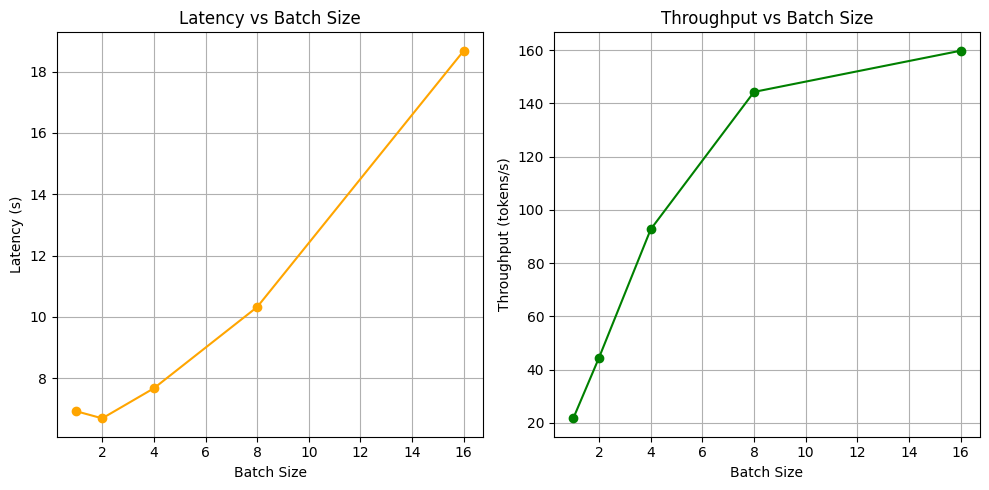

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))

# Latency plot
plt.subplot(1, 2, 1)
plt.plot(results_df["Batch Size"], results_df["Latency (s)"], marker='o', color='orange')
plt.title("Latency vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Latency (s)")
plt.grid(True)

# Throughput plot
plt.subplot(1, 2, 2)
plt.plot(results_df["Batch Size"], results_df["Throughput (tokens/s)"], marker='o', color='green')
plt.title("Throughput vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Throughput (tokens/s)")
plt.grid(True)

plt.tight_layout()
plt.show()
